In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation

In [2]:
body_pos = np.array([0.0, 1.0])  # initial position at y = 1, x = 0
circle_center = np.array([0.0, 0.0])
body_mass = 2.0
initial_velocity_vector = np.array([1.0, 0.0])  # initial velocity tangential to the circle
centripetal_force = 2.0
tangential_force = 0.0
num_frames = 100
time_step = 0.1  # Time step for each frame

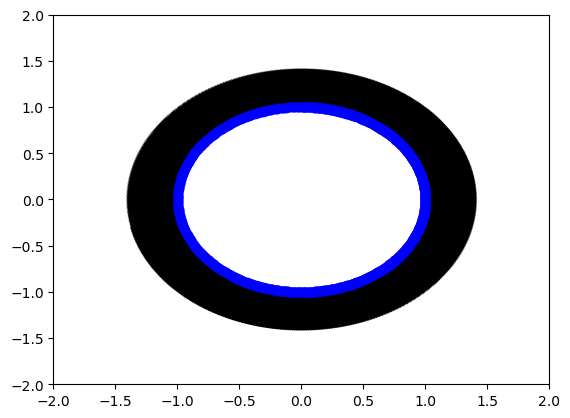

In [3]:
num_frames = 1000
time_step = 0.01  # Time step for each frame

fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# List to store frames
frames = []

# Loop to generate each frame
for frame in range(num_frames):
    # Calculate the unit vector pointing towards the circle center (centripetal direction)
    radius_vector = circle_center - body_pos
    distance = np.linalg.norm(radius_vector)
    centripetal_direction = radius_vector / distance

    # Calculate centripetal force vector
    centripetal_vector = centripetal_direction * centripetal_force

    # Calculate tangential force vector
    tangential_direction = np.array([-centripetal_direction[1], centripetal_direction[0]])
    tangential_vector = tangential_direction * tangential_force

    # Total force and acceleration
    force_vector = centripetal_vector + tangential_vector
    acceleration_vector = force_vector / body_mass

    # Update velocity and position using the Euler method
    initial_velocity_vector += acceleration_vector * time_step
    body_pos += initial_velocity_vector * time_step

    # Plot the body position and velocity vector
    line = ax.plot(body_pos[0], body_pos[1], 'bo')[0]
    quiver = ax.quiver(body_pos[0], body_pos[1], initial_velocity_vector[0], initial_velocity_vector[1], angles='xy', scale_units='xy', scale=1)

    # Append the current artists to the frames list
    frames.append([line, quiver])

In [ ]:
ani = ArtistAnimation(fig, frames, interval=10)
ani.save('animation2.gif', writer='pillow')